<a href="https://colab.research.google.com/github/joshfpedro/math-328/blob/main/assignment_1_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def bisection(f, a, b, tol=1e-6, max_iter=100):
    """Find root using bisection method."""

    # Step 1: Check that signs differ
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    # Step 2: Initialize
    history = []
    iteration = 0

    # Step 3: Main loop
    while iteration < max_iter:
        c = (a + b) / 2
        history.append(c)

        if abs(f(c)) < tol or abs(b - a) / 2 < tol:
            return c, iteration + 1, history

        # Update interval
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iteration += 1

    # Step 4: Return even if not converged
    return c, iteration, history

In [3]:
# Test 1: Simple case with known answer
f = lambda x: x**2 - 4  # Root at x = 2
root, iters, hist = bisection(f, 0, 3)

print(f"Root found: {root:.6f}")
print(f"Expected: 2.0")
print(f"Error: {abs(root - 2.0):.2e}")
print(f"Iterations: {iters}")

Root found: 2.000000
Expected: 2.0
Error: 2.38e-07
Iterations: 22


In [4]:
# Define test function (different from assignment)
f = lambda x: x**3 - x - 1
df = lambda x: 3*x**2 - 1  # Derivative for Newton

true_root = 1.3247179572447460  # From high-precision calculation

# Run bisection
root_bis, iters_bis, hist_bis = bisection(f, 1, 2)

# Run Newton (you'll implement this)
# root_new, iters_new, hist_new = newton(f, df, 1.5)

# Run secant (you'll implement this)
# root_sec, iters_sec, hist_sec = secant(f, 1.0, 2.0)

print(f"Bisection: {iters_bis} iterations, root = {root_bis:.10f}")

Bisection: 20 iterations, root = 1.3247175217


In [5]:
# Compute absolute error at each iteration
errors_bisection = [abs(x - true_root) for x in hist_bis]

print("Error progression (first 5 iterations):")
for i, err in enumerate(errors_bisection[:5]):
    print(f"  Iteration {i+1}: error = {err:.2e}")

Error progression (first 5 iterations):
  Iteration 1: error = 1.75e-01
  Iteration 2: error = 7.47e-02
  Iteration 3: error = 5.03e-02
  Iteration 4: error = 1.22e-02
  Iteration 5: error = 1.90e-02


In [14]:
# Convert hist_bis to numpy array so we can perform arithmetic

hist_bis = np.array(hist_bis)

error = np.abs(hist_bis - true_root)

In [21]:
error_ratio_list = []

for i in range(len(error) - 1):

  error_ratio = error[i+1] / error[i]
  error_ratio_list.append(error_ratio)

np.log(error_ratio_list)

array([-0.85267589, -0.39607244, -1.41474124,  0.44321724, -1.72027933,
        0.25699937, -2.177578  ,  1.06899576, -1.11375611, -3.77711619,
        3.0608144 , -0.74112967, -0.79662566, -0.9391038 , -1.50888738,
       -0.27332097, -1.8504844 ,  0.98635787, -1.15984825])

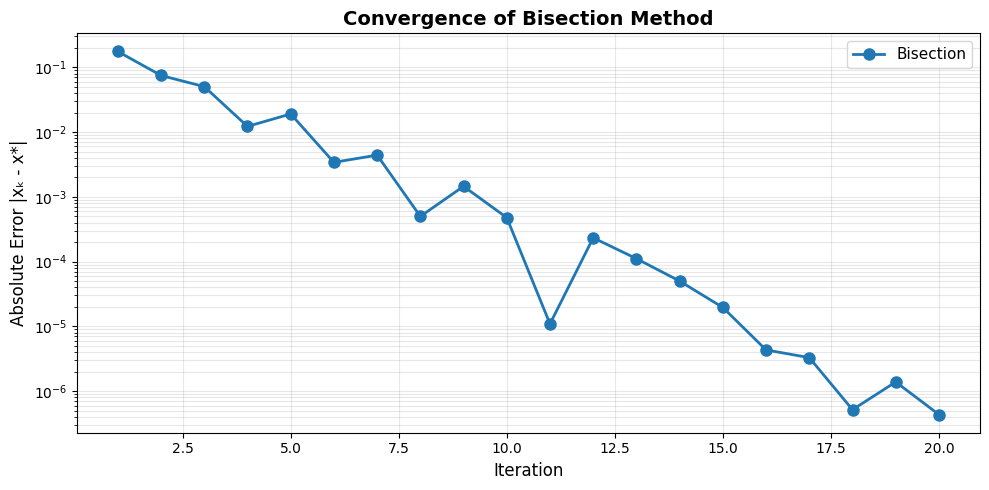

In [23]:
# Create convergence plot
fig, ax = plt.subplots(figsize=(10, 5))

iterations = range(1, len(errors_bisection) + 1)
ax.semilogy(iterations, errors_bisection, 'o-',
            linewidth=2, markersize=8, label='Bisection')

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Absolute Error |xₖ - x*|', fontsize=12)
ax.set_title('Convergence of Bisection Method', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, which='both')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()